## 1.0 Introduction

### 1.1 Import modules

In [51]:
from gumly import imbalanced
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd


## 2.0 Oversampling

In [2]:
def create_dataset_over(
    n_samples=1000,
    weights=(0.01, 0.01, 0.98),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )

In [3]:
def dataset_samples_over(X, y):
    return sorted([x[1] for x in Counter(y).items()])

In [4]:
X, y = create_dataset_over()
class_map = dataset_samples_over(X, y)
total_examples = sum(class_map)
actual_examples = class_map[-1] * 3

In [5]:
total_examples, actual_examples

(1000, 2916)

### 2.1 Oversampling Random 

In [6]:
X_resample, y_resample = imbalanced.oversampler(X, y, 'random', random_state=0)
class_map = dataset_samples_over(X_resample, y_resample)
total_examples = sum(class_map)
actual_examples = class_map[-1] * 3

In [7]:
total_examples,actual_examples 

(2916, 2916)

### 2.2 Ploting exemple with Logistic Regression to understand

In [60]:
def plot_resampling(X, y, ax, sampler=None, title=None, regular=None):
    if regular == True:
        ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor="k")
        if title is None:
            title = f"Resampling with {sampler.__class__.__name__}"
        ax.set_title(title)
        sns.despine(ax=ax, offset=10)
    else:
        X_res, y_res = sampler[0],sampler[1]
        ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
        if title is None:
            title = f"Resampling with {sampler.__class__.__name__}"
        ax.set_title(title)
        sns.despine(ax=ax, offset=10)

In [9]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

In [10]:
clf = LogisticRegression()

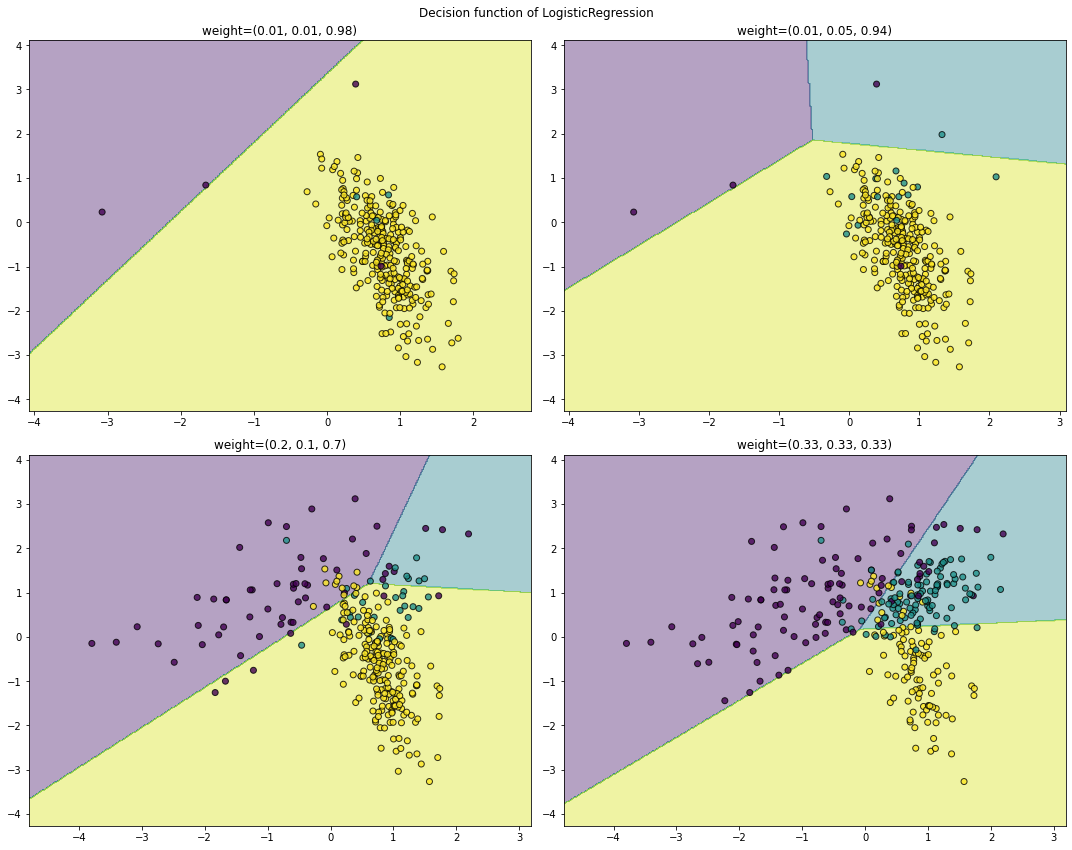

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

weights_arr = (
    (0.01, 0.01, 0.98),
    (0.01, 0.05, 0.94),
    (0.2, 0.1, 0.7),
    (0.33, 0.33, 0.33),
)
for ax, weights in zip(axs.ravel(), weights_arr):
    X, y = create_dataset_over(n_samples=300, weights=weights)
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax, title=f"weight={weights}")
    fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

### 2.2.1 Exemple Over-Sampling Balanced

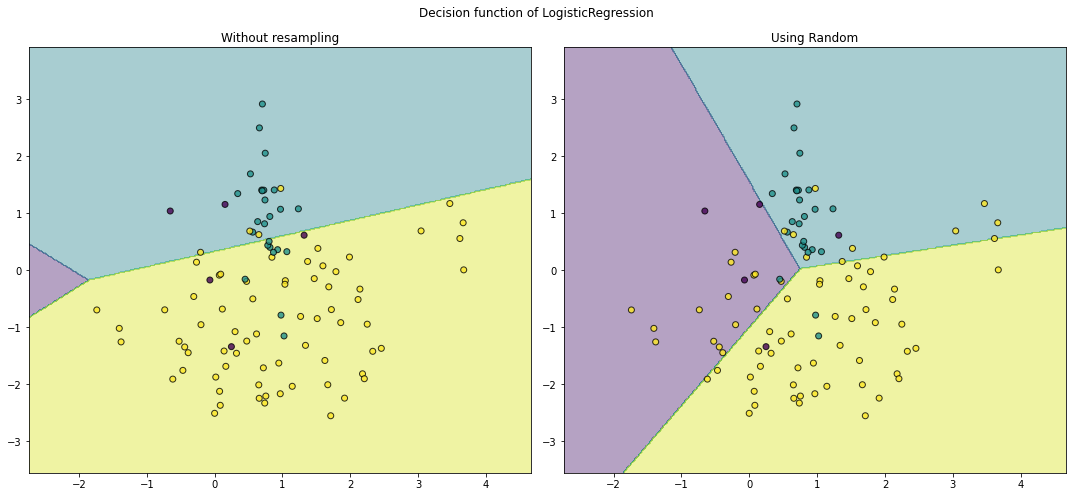

In [30]:
X, y = create_dataset_over(n_samples=100, weights = (0.05,0.25,0.7))
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
clf.fit(X, y)

plot_decision_function(X, y, clf, axs[0], title="Without resampling")



sampler = imbalanced.oversampler(X, y, 'random', random_state=0)
model = clf.fit(sampler[0], sampler[1])

plot_decision_function(X, y, model, axs[1], title="Using Random")

fig.suptitle(f"Decision function of LogisticRegression")
fig.tight_layout()



TypeError: plot_resampling() got multiple values for argument 'ax'

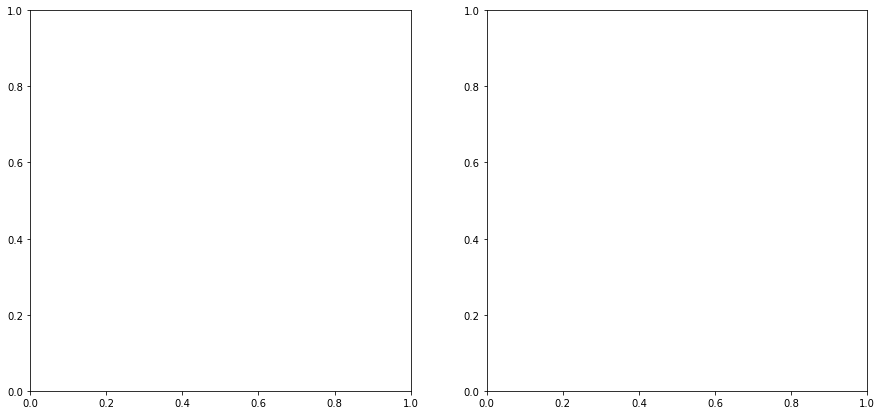

In [62]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))


#plot_resampling(X,y,regular =True, ax=axs[0])

plot_resampling(X, y, sampler, ax=axs[0])

### 2.2 Oversampling Smote

In [ ]:
X_resample, y_resample = imbalanced.oversampler(X, y, 'smote', random_state=0)
class_map = dataset_samples_over(X_resample, y_resample)
total_examples = sum(class_map)
actual_examples = class_map[-1] * 3

In [ ]:
total_examples

In [ ]:
actual_examples 

### 2.3 Oversampling Smote

In [ ]:
X_resample, y_resample = imbalanced.oversampler(X, y, 'adasyn', random_state=0)
class_map = dataset_samples_over(X_resample, y_resample)
total_examples = sum(class_map)
actual_examples = class_map[-1] * 3

In [ ]:
total_examples

In [ ]:
actual_examples 

## 3.0 Undersampling 

In [ ]:
def create_dataset_under(
    n_samples=5000,
    weights=(0.01, 0.05, 0.94),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )

In [ ]:
def dataset_samples_under(X, y):
    return sorted([x[1] for x in Counter(y).items()])

In [ ]:
X, y = create_dataset_over()
class_map = dataset_samples_under(X, y)
total_examples = sum(class_map)
actual_examples = class_map[-1] * 3

In [ ]:
total_examples

In [ ]:
actual_examples

### 3.1 Undersampling Random 

In [ ]:
X_resample, y_resample = imbalanced.undersampler(X, y, 'random', random_state=0)
class_map = dataset_samples_under(X_resample, y_resample)
total_examples = sum(class_map)
actual_examples = class_map[-1] * 3

In [ ]:
total_examples

In [ ]:
actual_examples

### 3.2 Undersampling Nearmiss

In [ ]:
X_resample, y_resample = imbalanced.undersampler(X, y, 'nearmiss', random_state=0)
class_map = dataset_samples_under(X_resample, y_resample)
total_examples = sum(class_map)
actual_examples = class_map[-1] * 3

In [ ]:
total_examples

In [ ]:
actual_examples

# 4.0 Combine

In [ ]:
def create_dataset_over(
    n_samples=1000,
    weights=(0.01, 0.01, 0.98),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )


def dataset_samples_under(X, y):
    return sorted([x[1] for x in Counter(y).items()])



In [ ]:
X, y = create_dataset_over()
class_map = dataset_samples_under(X, y)
total_examples = sum(class_map)
actual_examples = class_map[-1] * 3

In [ ]:
total_examples, actual_examples

## 4.1 SMOTEENN

In [ ]:
X_resample, y_resample = imbalanced.combine(X, y, 'smoteenn', random_state=0)
class_map = dataset_samples_under(X_resample, y_resample)
total_examples = sum(class_map)
actual_examples = class_map[-1] * 3

In [ ]:
total_examples, actual_examples

In [ ]:
X_resample, y_resample = imbalanced.combine(X, y, 'smotetomek', random_state=0)
class_map = dataset_samples_under(X_resample, y_resample)
total_examples = sum(class_map)
actual_examples = class_map[-1] * 3

In [ ]:
total_examples, actual_examples